<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.762688,43.066782,20.150000,0.002115,135.981585,135.978342,0.003243
1,0.0,1.0,35.765432,22.404491,40.158448,-0.011353,108.317018,108.327266,-0.010248
2,0.0,2.0,65.122380,58.985007,38.928637,0.000525,173.036550,173.035380,0.001170
3,0.0,3.0,70.074364,61.606227,93.283274,0.000858,234.964723,234.963624,0.001099
4,0.0,4.0,61.669394,23.878328,76.505022,-0.011656,172.041087,172.051604,-0.010517
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.423010,25.825968,67.946176,-0.001714,183.193441,183.195798,-0.002357
249996,999.0,246.0,76.861047,72.147400,46.292365,0.000688,205.301500,205.300989,0.000511
249997,999.0,247.0,57.867627,38.861232,73.226152,0.001301,179.956312,179.955540,0.000772
249998,999.0,248.0,33.033116,75.553083,32.703370,0.000058,151.289627,151.290476,-0.000849


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.762688  43.066782  20.150000  ...  135.981585  135.978342  0.003243
      1.0    35.765432  22.404491  40.158448  ...  108.317018  108.327266 -0.010248
      2.0    65.122380  58.985007  38.928637  ...  173.036550  173.035380  0.001170
      3.0    70.074364  61.606227  93.283274  ...  234.964723  234.963624  0.001099
      4.0    61.669394  23.878328  76.505022  ...  172.041087  172.051604 -0.010517
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  79.423010  25.825968  67.946176  ...  183.193441  183.195798 -0.002357
      246.0  76.861047  72.147400  46.292365  ...  205.301500  205.300989  0.000511
      247.0  57.867627  38.861232  73.226152  ...  179.956312  179.955540  0.000772
      248.0  33.033116  75.553083  32.703370  ...  151.289627  151.290476 -0.000849
      249.0  55.294252  66.760195  43.491266  ...  175.546496  175.546313  0.000183

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.762688  43.066782  20.150000  ...  135.981585  135.978342  0.003243
      1.0    35.765432  22.404491  40.158448  ...  108.317018  108.327266 -0.010248
      2.0    65.122380  58.985007  38.928637  ...  173.036550  173.035380  0.001170
      3.0    70.074364  61.606227  93.283274  ...  234.964723  234.963624  0.001099
      4.0    61.669394  23.878328  76.505022  ...  172.041087  172.051604 -0.010517
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  79.423010  25.825968  67.946176  ...  183.193441  183.195798 -0.002357
      246.0  76.861047  72.147400  46.292365  ...  205.301500  205.300989  0.000511
      247.0  57.867627  38.861232  73.226152  ...  179.956312  179.955540  0.000772
      248.0  33.033116  75.553083  32.703370  ...  151.289627  151.290476 -0.000849
      249.0  55.294252  66.760195  43.491266  ...  175.546496  175.546313  0.000183

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.762688,43.066782,20.150000,0.002115,135.981585,135.978342,0.003243
1,0.0,1.0,35.765432,22.404491,40.158448,-0.011353,108.317018,108.327266,-0.010248
2,0.0,2.0,65.122380,58.985007,38.928637,0.000525,173.036550,173.035380,0.001170
3,0.0,3.0,70.074364,61.606227,93.283274,0.000858,234.964723,234.963624,0.001099
4,0.0,4.0,61.669394,23.878328,76.505022,-0.011656,172.041087,172.051604,-0.010517
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,79.423010,25.825968,67.946176,-0.001714,183.193441,183.195798,-0.002357
249996,999.0,246.0,76.861047,72.147400,46.292365,0.000688,205.301500,205.300989,0.000511
249997,999.0,247.0,57.867627,38.861232,73.226152,0.001301,179.956312,179.955540,0.000772
249998,999.0,248.0,33.033116,75.553083,32.703370,0.000058,151.289627,151.290476,-0.000849


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.762688  43.066782  20.150000  ...  135.981585  135.978342  0.003243
      1.0    35.765432  22.404491  40.158448  ...  108.317018  108.327266 -0.010248
      2.0    65.122380  58.985007  38.928637  ...  173.036550  173.035380  0.001170
      3.0    70.074364  61.606227  93.283274  ...  234.964723  234.963624  0.001099
      4.0    61.669394  23.878328  76.505022  ...  172.041087  172.051604 -0.010517
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  79.423010  25.825968  67.946176  ...  183.193441  183.195798 -0.002357
      246.0  76.861047  72.147400  46.292365  ...  205.301500  205.300989  0.000511
      247.0  57.867627  38.861232  73.226152  ...  179.956312  179.955540  0.000772
      248.0  33.033116  75.553083  32.703370  ...  151.289627  151.290476 -0.000849
      249.0  55.294252  66.760195  43.491266  ...  175.546496  175.546313  0.000183

[250000 rows x 7 columns]

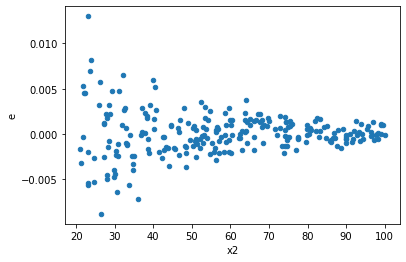

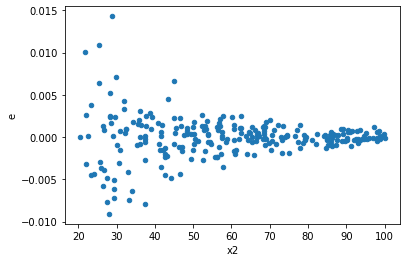

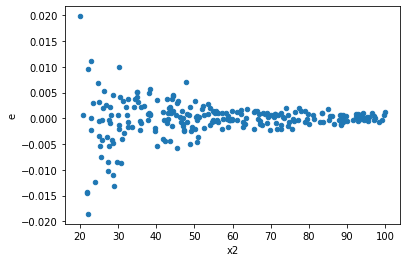

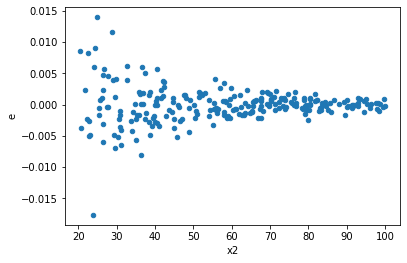

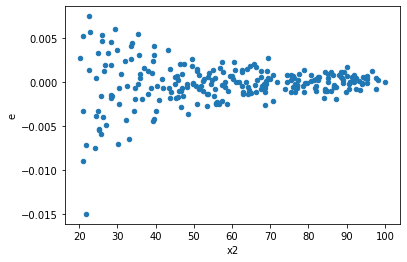

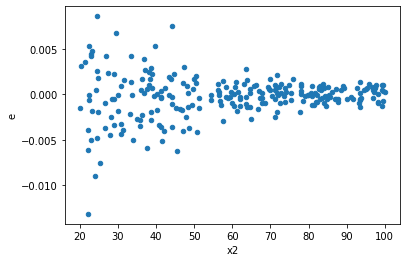

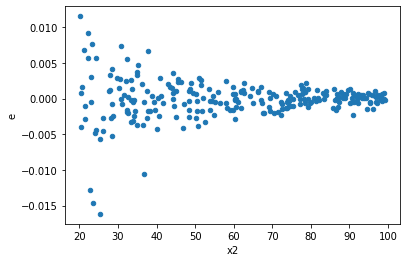

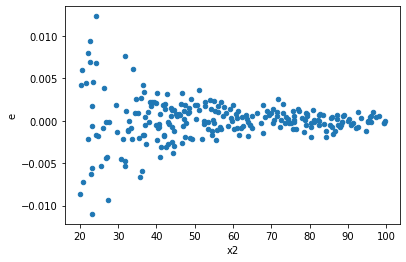

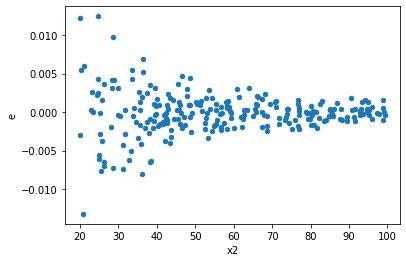

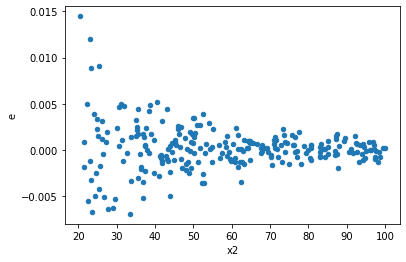

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,118.0,126.0,0.000498393843998266,0.0010792222185984723,4.2597764444296235e-06,8.633777748787778e-06,2.0279146404879933,0.00012365671343395057,0.999938171643283,Reject005=0 : Heteroscedasticity
2.0,135.0,109.0,0.0007308453616343073,0.0006718447594865521,5.454069862942592e-06,6.2207848100606674e-06,1.1385463345627924,0.4722001109954195,0.7638999445022903,Reject005=1 : Homoscedasticity
3.0,122.0,122.0,0.0005017634902234749,0.0007495895601235121,4.146805704326239e-06,6.194955042343075e-06,1.4939101284345353,0.027460759315104832,0.9862696203424476,Reject005=0 : Heteroscedasticity
6.0,107.0,137.0,0.0003015786642945677,0.0013122765598533913,2.845081738627997e-06,9.649092351863172e-06,3.398505433486074,2.1981572118079384e-10,0.9999999998900921,Reject005=0 : Heteroscedasticity
7.0,119.0,125.0,7.690052145459463e-05,0.0014777137040212958,6.516993343609714e-07,1.191704600017174e-05,18.29354885530781,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,127.0,117.0,0.00012534134896543303,0.0020003926692635948,9.9477261083677e-07,1.7244764390203403e-05,17.32362400438272,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
9.0,139.0,105.0,0.0007964440495393085,0.0006740188846571353,5.77133369231383e-06,6.4809508140109165e-06,1.1203205287963551,0.5286736664333402,0.7356631667833299,Reject005=1 : Homoscedasticity
12.0,121.0,123.0,0.0013527738079701088,0.0019046529815422116,1.1273115066417573e-05,1.5611909684772226e-05,1.3850674838051453,0.0734474267003582,0.9632762866498209,Reject005=1 : Homoscedasticity
13.0,126.0,118.0,0.001000844199261472,0.001045740679876244,8.006753594091776e-06,8.937954528856785e-06,1.1156964829412666,0.5450150092541506,0.7274924953729247,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,124.0,120.0,0.0018056586315602927,0.00019549173825221116,1.468015147609994e-05,1.6427877164051357e-06,0.11187503883429342,1.9985867287789716e-28,Reject005=0 : Heteroscedasticity
1.0,118.0,126.0,0.000498393843998266,0.0010792222185984723,4.2597764444296235e-06,8.633777748787778e-06,2.0279146404879933,0.00012365671343395057,Reject005=0 : Heteroscedasticity
2.0,135.0,109.0,0.0007308453616343073,0.0006718447594865521,5.454069862942592e-06,6.2207848100606674e-06,1.1385463345627924,0.4722001109954195,Reject005=1 : Homoscedasticity
3.0,122.0,122.0,0.0005017634902234749,0.0007495895601235121,4.146805704326239e-06,6.194955042343075e-06,1.4939101284345353,0.027460759315104832,Reject005=0 : Heteroscedasticity
4.0,112.0,132.0,0.0013139831099003767,9.955668827746678e-05,1.1837685674778168e-05,7.59974719675319e-07,0.06428723545401144,4.02990688025704e-43,Reject005=0 : Heteroscedasticity
5.0,118.0,126.0,0.0014221062243114,0.0001224311158377279,1.215475405394359e-05,9.794489267018233e-07,0.08062527939013367,1.3759851385034885e-36,Reject005=0 : Heteroscedasticity
6.0,107.0,137.0,0.0003015786642945677,0.0013122765598533913,2.845081738627997e-06,9.649092351863172e-06,3.398505433486074,2.1981572118079384e-10,Reject005=0 : Heteroscedasticity
7.0,119.0,125.0,7.690052145459463e-05,0.0014777137040212958,6.516993343609714e-07,1.191704600017174e-05,18.29354885530781,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,127.0,117.0,0.00012534134896543303,0.0020003926692635948,9.9477261083677e-07,1.7244764390203403e-05,17.32362400438272,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    695
Reject005=1 : Homoscedasticity      305
Name: Result_test, dtype: int64